# Problem statement: Analyzing the customers preference of Airbnb in New York City to gain insights on expansion plans

### Importing libraries

In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Checking the location and changing directory 

In [107]:
pwd

'C:\\Users\\bhart\\Downloads\\Portfolio proj'

## Data reading and cleaning process

In [108]:
airbnb = pd.read_csv("Airbnb_Open_Data.csv")

In [109]:
#Taking the data set's columns 
col_names = airbnb.columns
col_names

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

#### Dropping all the duplicates 

In [110]:
airbnb=airbnb.drop_duplicates()

#### Finding the Primary key

In [111]:
#The primary key is the column with the highest number of unique data rows

airbnb.count().unique()
number_of_records = max(airbnb.count())
number_of_records

102058

#### Checking the data info on columns

In [112]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

In [113]:
# The two columns with the max number of non null data is "ID" and "Host ID"
primary_key = ['id','host id']
for i in primary_key:
    c=pd.DataFrame(airbnb[i].unique())
    c=c.count()
    print(i,c)

id 0    102058
dtype: int64
host id 0    102057
dtype: int64


#### ID turns out as the primary key

id = 0.0%
NAME = 0.24%
host id = 0.0%
host_identity_verified = 0.28%
host name = 0.4%
neighbourhood group = 0.03%
neighbourhood = 0.02%
lat = 0.01%
long = 0.01%
country = 0.52%
country code = 0.13%
instant_bookable = 0.1%
cancellation_policy = 0.07%
room type = 0.0%
Construction year = 0.21%
price = 0.24%
service fee = 0.27%
minimum nights = 0.39%
number of reviews = 0.18%
last review = 15.51%
reviews per month = 15.5%
review rate number = 0.31%
calculated host listings count = 0.31%
availability 365 = 0.44%
house_rules = 50.8%
license = 100.0%


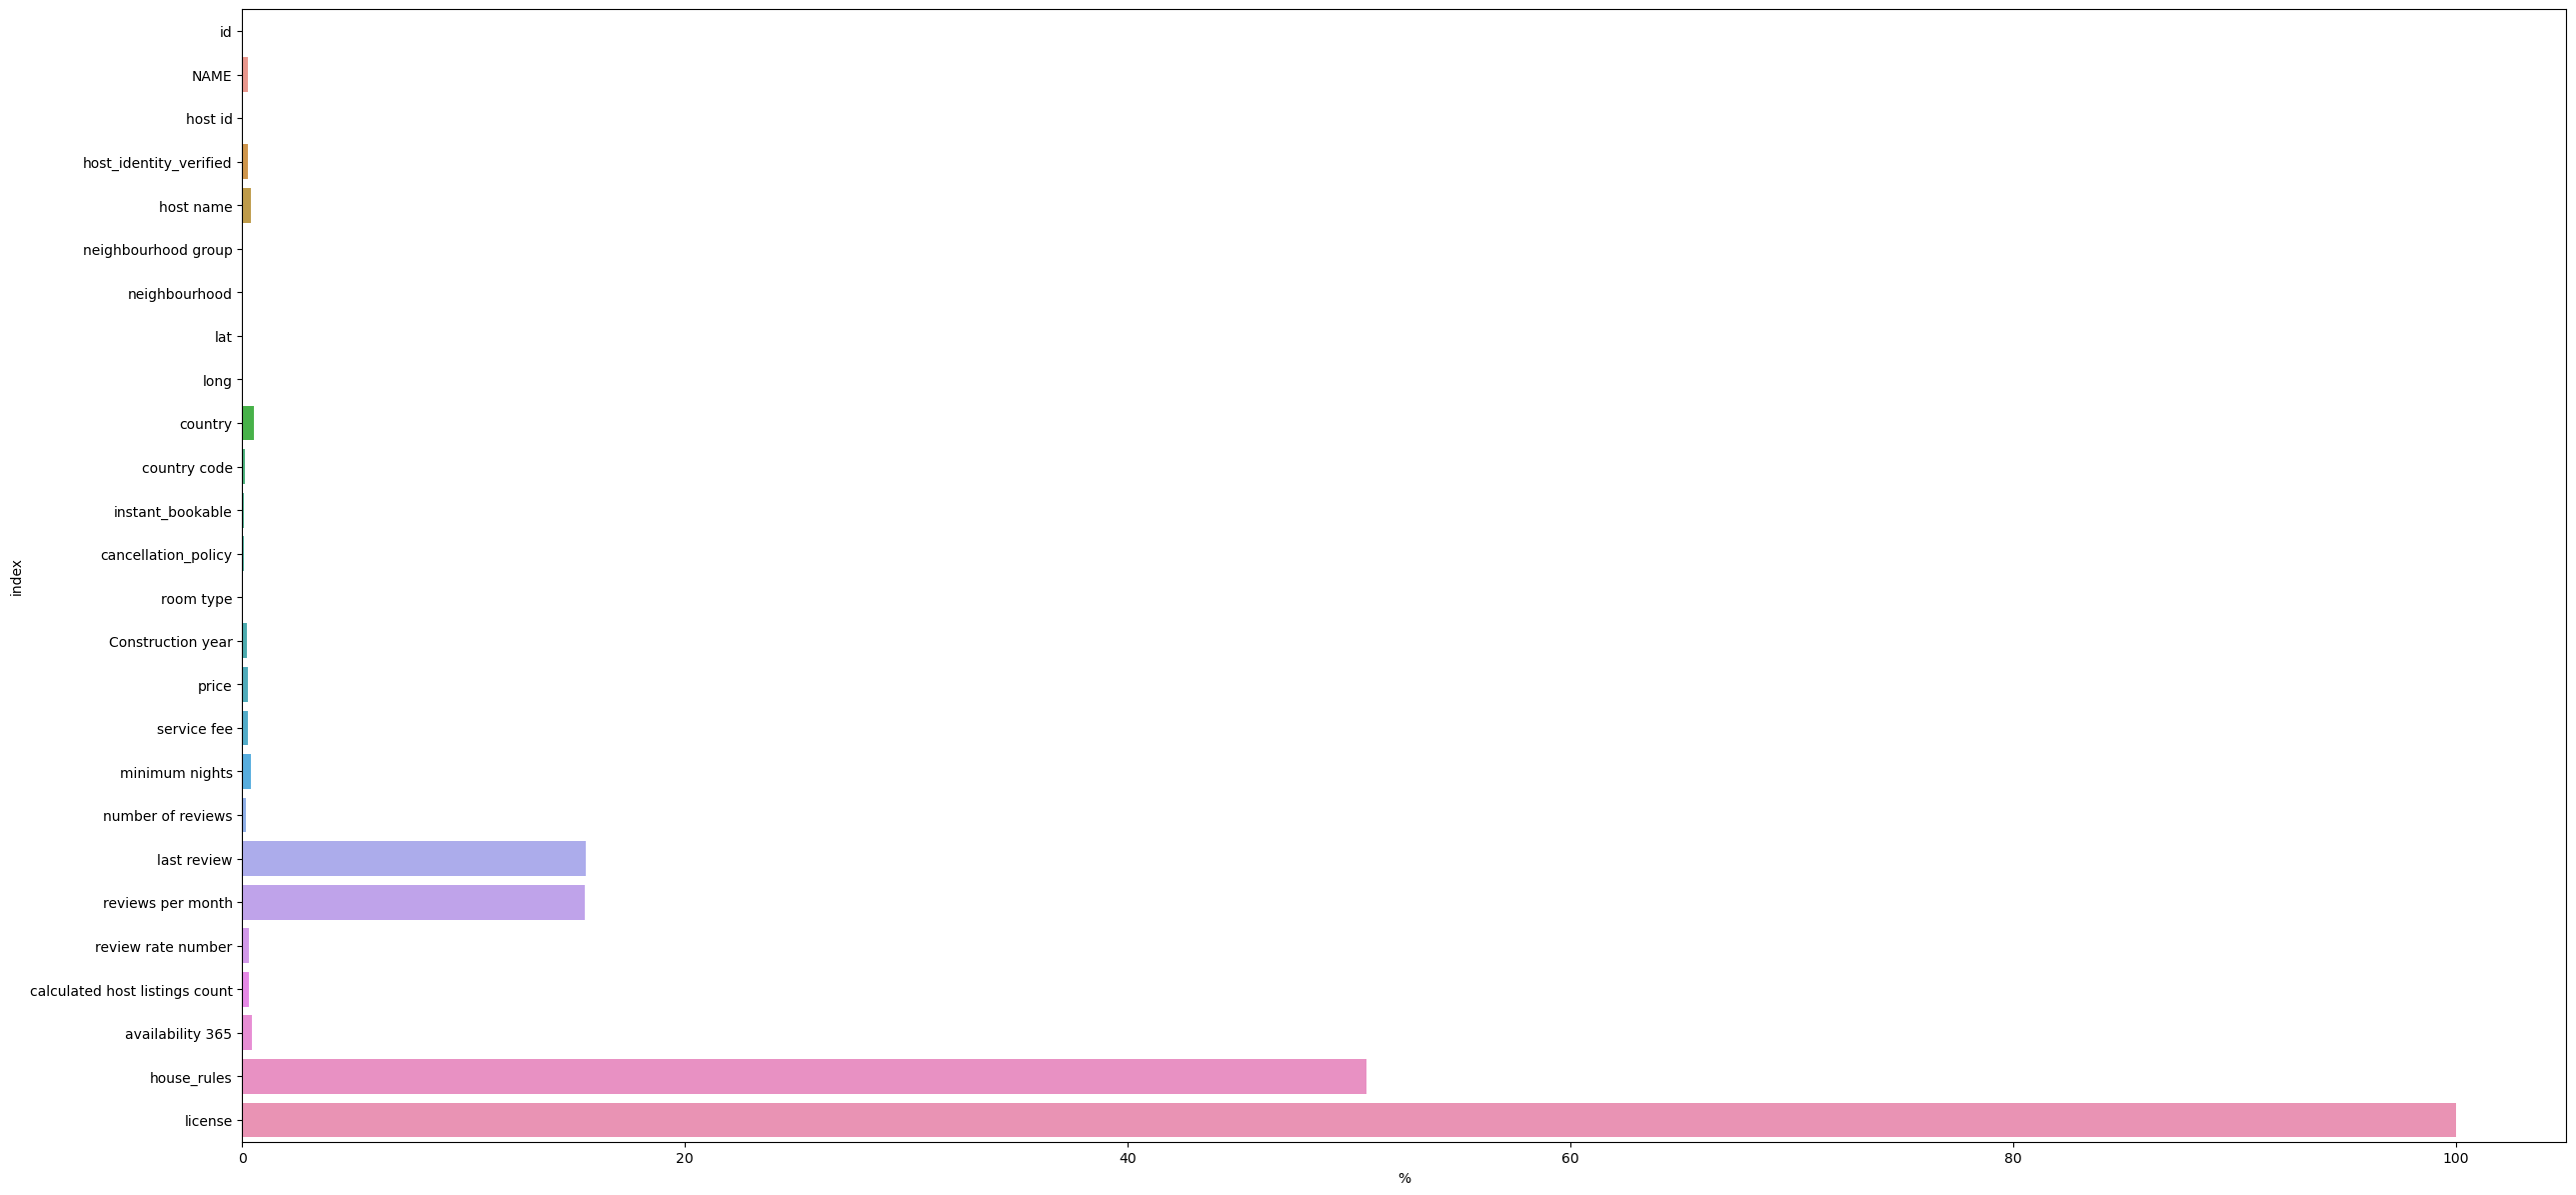

In [114]:
#Checking nulls in every columns 
for i in col_names:
    total_null=airbnb[i].isna().sum()
    print(i+" = "+str(round((total_null/number_of_records)*100,2))+'%')
col_names = airbnb.columns
total_null=pd.DataFrame(airbnb.isna().sum().reset_index())
total_null['number_of_records']=number_of_records
total_null['%']=(round((total_null[0]/total_null['number_of_records'])*100,2))
total_null=total_null[['index','%']]
plt.figure(figsize=(30,15),dpi=100)
chart = sns.barplot(x=total_null['%'],y=total_null['index'],orient = 'h')

In [115]:
remove_columns =['country','country code','license','last review','reviews per month','house_rules']
for i in remove_columns:
    airbnb.drop(i, axis=1, inplace=True)

In [116]:
airbnb_filtered = airbnb.dropna()
#Checking how much data is left after cleaning process 1
(max(airbnb_filtered.count())/number_of_records)*100

96.98308804797271

#### Percentage of nulls for each column has been checked and columns with null values more than 5% are removed. Null value rows for the rest are deleted

In [118]:
airbnb_filtered.shape

(98979, 20)

In [119]:
# checking the data type of all the columns 
airbnb_filtered.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

#### Fixing the price columns by removing the '$'  and ',' from the string

In [120]:
airbnb_filtered['price']  = airbnb_filtered['price'] .replace('[\$,]', '', regex=True).astype(int)
airbnb_filtered['service fee']  = airbnb_filtered['service fee'] .replace('[\$,]', '', regex=True).astype(int)


#### Changing the datatype of numeric columns to integer

In [121]:
numeric_columns =["Construction year",
"price",
"service fee",
"minimum nights",
"number of reviews",
"review rate number",
"calculated host listings count"]


for i in numeric_columns:
    airbnb_filtered[i] = airbnb_filtered[i].astype(int)
airbnb_filtered.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                   int32
price                               int32
service fee                         int32
minimum nights                      int32
number of reviews                   int32
review rate number                  int32
calculated host listings count      int32
availability 365                  float64
dtype: object

#### Preliminary descriptive statistics 

In [122]:
airbnb_filtered.describe().transpose().astype(int)

,count,mean,std,min,25%,50%,75%,max
id,98979,29332832,16226194,1001254,15222785,29433188,43377934,57358028
host id,98979,-2147483648,-2147483648,123600518,-2147483648,-2147483648,-2147483648,-2147483648
lat,98979,40,0,40,40,40,40,40
long,98979,-73,0,-74,-73,-73,-73,-73
Construction year,98979,2012,5,2003,2008,2012,2017,2022
price,98979,625,331,50,340,625,913,1200
service fee,98979,125,66,10,68,125,183,240
minimum nights,98979,8,28,-1223,2,3,5,5645
number of reviews,98979,27,49,0,1,7,30,1024
review rate number,98979,3,1,1,2,3,4,5


#### Incorrect and outlier data - There are negative values in Minimum nights and availability 365, which wouldn't make sense. Also, there are outliers in both of them in the positive side as well. Hence, removing the positive outliers.

less than 50:  0.9906772634431434
less than 31:  0.9843272866994277
less than 30:  0.8703108252947481


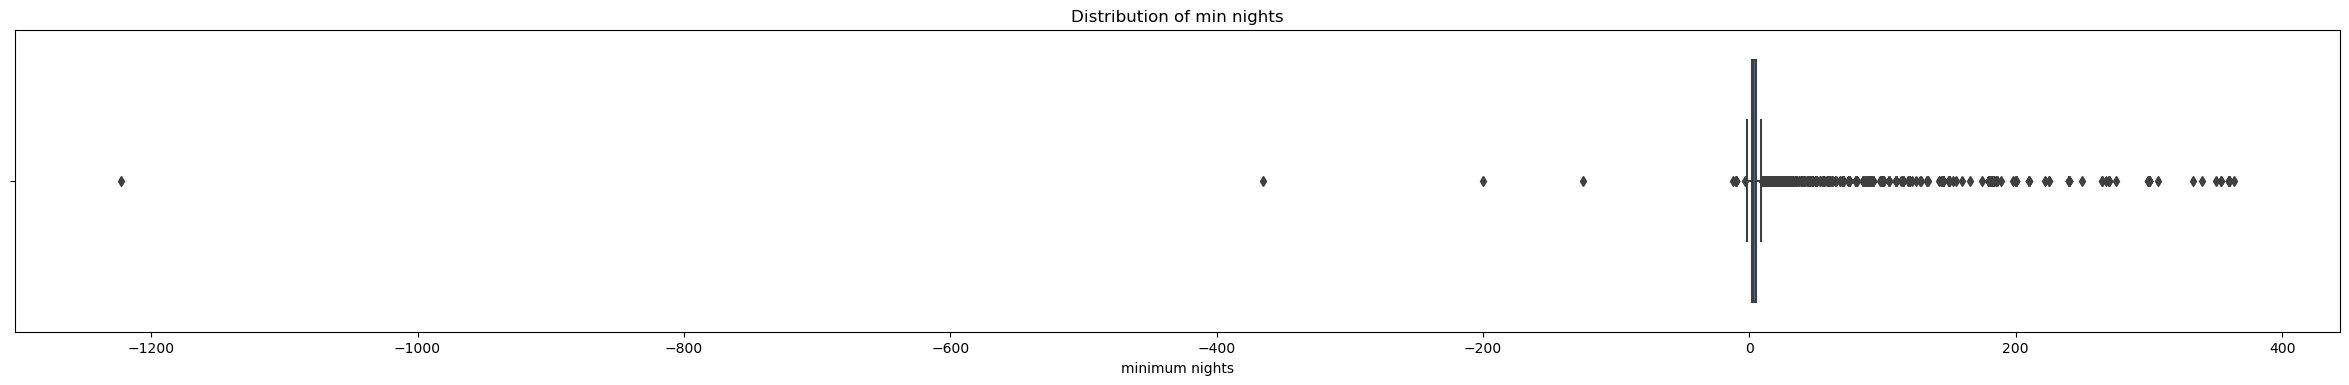

In [123]:
### Checking for Outliers in minimum nights
df=airbnb_filtered.copy()
# Assuming the data is correct we want to use hotels that have less than 365 days of minimum nights 
df=df[df['minimum nights']< 365]

plt.figure(figsize=(30,4),dpi=100)
sns.boxplot(data=df,x='minimum nights')
plt.title('Distribution of min nights');
### We see that 75% of the data lies within 5 days now since we need to keep the data within 95 % 
### of the we shal try different cases :less 50,31 and 30
minits_check=df[df['minimum nights']<50]
print('less than 50: ',minits_check['minimum nights'].count()/df['minimum nights'].count())
minits_check=df[df['minimum nights']<31]
print('less than 31: ',minits_check['minimum nights'].count()/df['minimum nights'].count())
minits_check=df[df['minimum nights']<30]
print('less than 30: ',minits_check['minimum nights'].count()/df['minimum nights'].count())

In [124]:
# Filtering the incorrect data 
### Minimum nights 
df=df[df['minimum nights']<31]
# Since minimum nights should always be a positive number, we must remove all the data points that are less than 0 
df=df[df['minimum nights'] >= 0]

less than 366:  0.973391139968768
less than 365:  0.9493815237938686


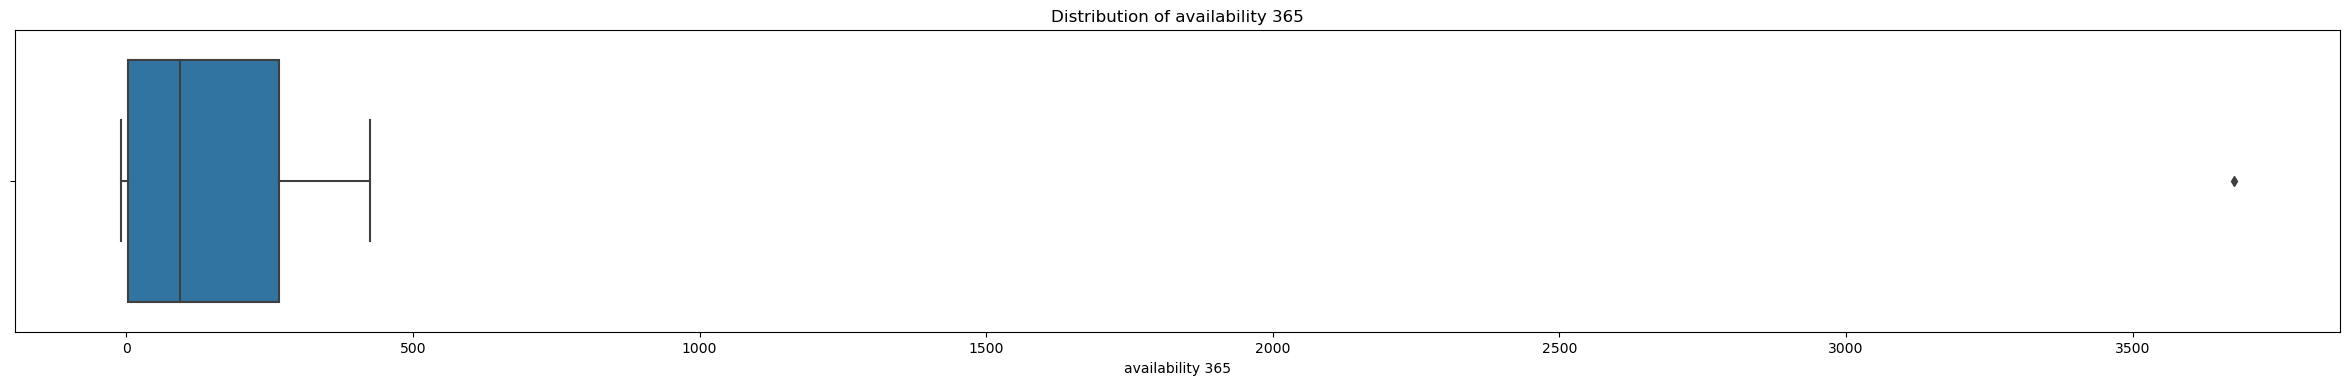

In [125]:
### Checking for Outliers in availability 365
plt.figure(figsize=(30,4),dpi=100)
sns.boxplot(data=df,x='availability 365')
plt.title('Distribution of availability 365');
### We see that 75% of the data lies within 268 days now since we need to keep the data within 95 % 
### of the we shal try different cases :less 366, 365

minits_check=df[df['availability 365']<366]
print('less than 366: ',minits_check['availability 365'].count()/df['availability 365'].count())
minits_check=df[df['availability 365']<365 ]
print('less than 365: ',minits_check['availability 365'].count()/df['availability 365'].count())


In [126]:
# Filtering the incorrect data 
### Minimum nights 
df=df[df['availability 365'] < 366] 
df=df[df['availability 365'] >= 0]
df.shape

(94340, 20)

In [127]:
### Checking Neighbourhood for error in names 
df['neighbourhood group'].unique()
### Replacing brookln with Brooklyn 
df=df.replace("brookln", "Brooklyn")

In [128]:
(max(df.count())/number_of_records)*100

92.43763350251818

### After cleaning the data and keeping the relevant data points, around 92% of the data remains.

## EDA

In [129]:
### Descriptive Analysis 
df.describe().transpose().astype(int)

,count,mean,std,min,25%,50%,75%,max
id,94340,29875478,15955332,1001254,16322552,29999571,43570549,57358028
host id,94340,-2147483648,-2147483648,123600518,-2147483648,-2147483648,-2147483648,-2147483648
lat,94340,40,0,40,40,40,40,40
long,94340,-73,0,-74,-73,-73,-73,-73
Construction year,94340,2012,5,2003,2008,2012,2017,2022
price,94340,626,331,50,341,625,914,1200
service fee,94340,125,66,10,68,125,183,240
minimum nights,94340,6,9,1,1,3,5,30
number of reviews,94340,27,48,0,1,7,30,1024
review rate number,94340,3,1,1,2,3,4,5


#### Checking the correlation of the numerical factors

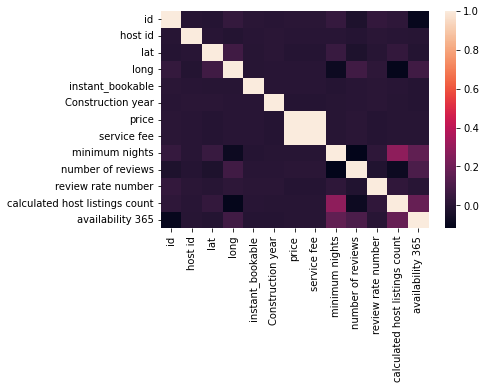

In [130]:
sns.heatmap(df.corr())
plt.show()

### Insight : The only relevant correlation is between service fee and price

#### The different KPIs are being compared with respect to the Neighbourhood Group and Room Type. This Analysis will start at the Top and will be deep diving into the most Granular Level for each of the KPIs. The reason for taking these two factors is because there is a significant difference amongst these groups with respect to factors like prices,reviews,etc.

## Univariate Analysis

### 1. Neighbourhood group

<AxesSubplot:xlabel='long', ylabel='lat'>

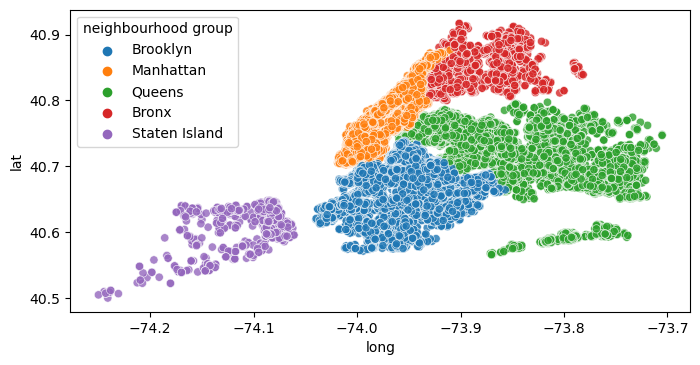

In [131]:
### First lets understand a few things about the levels
## The below graphs indicate the distribution of Airbnbs across neighborhood group
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,y='lat',x='long',hue='neighbourhood group',alpha=0.8)

### Insight: Map shows the current listings in Staten Island is less and are scattered – Possible neighborhood to expand more

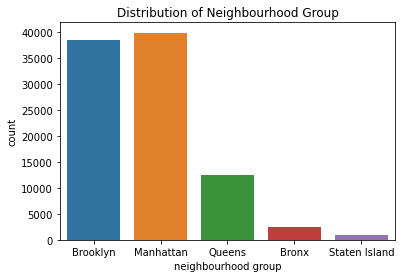

In [132]:
sns.countplot(data=df,x='neighbourhood group')
plt.title('Distribution of Neighbourhood Group');

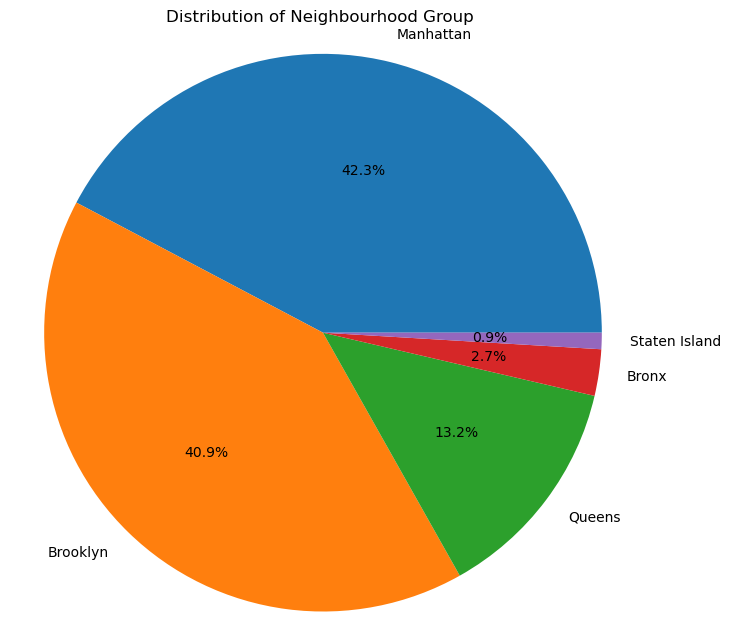

In [133]:
data =df['neighbourhood group'].value_counts().reset_index()
data=pd.DataFrame(data)
plt.figure(figsize=(8,8),dpi=100)
plt.title('Distribution of Neighbourhood Group');
figure_1=plt.pie(x=data['neighbourhood group'],labels=data['index'],autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

In [134]:
neighbourhood_group = pd.DataFrame(df[['neighbourhood group']].value_counts()).reset_index()
neighbourhood_group.head()

,neighbourhood group,0
0,Manhattan,39881
1,Brooklyn,38574
2,Queens,12450
3,Bronx,2541
4,Staten Island,894


### Insight: Majority of the data (83.2%) is coming from Manhattan and Brooklyn 

### 2. Types of rooms in an Airbnb

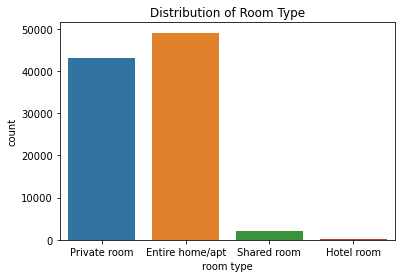

In [136]:
chart=sns.countplot(data=df,x='room type')
plt.title('Distribution of Room Type');


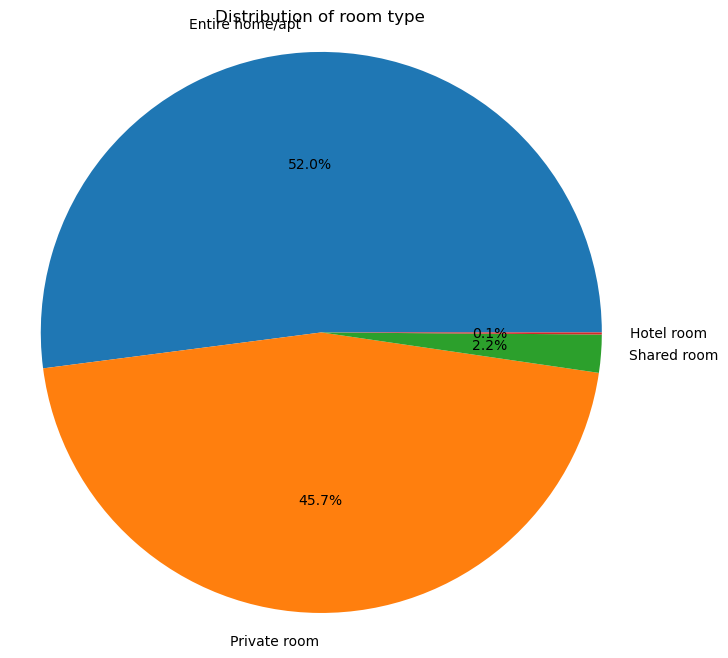

In [137]:
data =df['room type'].value_counts().reset_index()
data=pd.DataFrame(data)
plt.figure(figsize=(8,8),dpi=100)
plt.title('Distribution of room type');
figure_1=plt.pie(x=data['room type'],labels=data['index'],autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

### Insight: 97.7% of the AirBnB is from either Private room or Entire home / apt 

In [138]:
#finding count of each room type in each neighborhood group
test = df[['neighbourhood group','room type']]
test_group=test.value_counts().sort_values(ascending=False).reset_index()
type(test_group)
test_group

,neighbourhood group,room type,0
0,Manhattan,Entire home/apt,23953
1,Brooklyn,Entire home/apt,18922
2,Brooklyn,Private room,18871
3,Manhattan,Private room,15004
4,Queens,Private room,7271
5,Queens,Entire home/apt,4833
6,Bronx,Private room,1491
7,Bronx,Entire home/apt,943
8,Manhattan,Shared room,828
9,Brooklyn,Shared room,774


## Doing a deeper dive into all the levels with KPIs in mind 

### Bivariate anaylsis

### 1. Price

### Neighborhood group and price

<AxesSubplot:xlabel='long', ylabel='lat'>

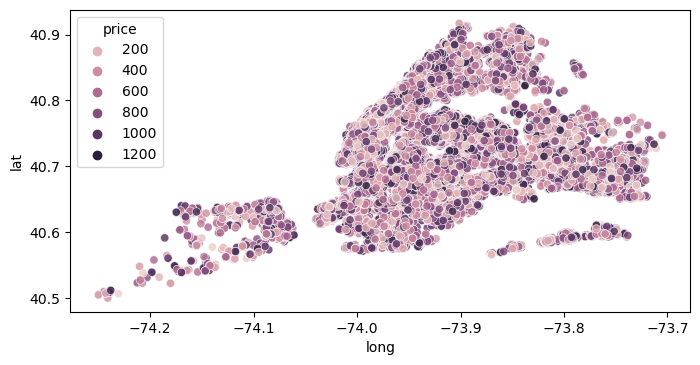

In [140]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,y='lat',x='long',hue='price',alpha=0.8)

### Checking the price between 0 to median

In [166]:
median_price=df['price'].median()
median_price

625.0

In [167]:
data_price = df[df['price'].between(0,625)]

<AxesSubplot:xlabel='long', ylabel='lat'>

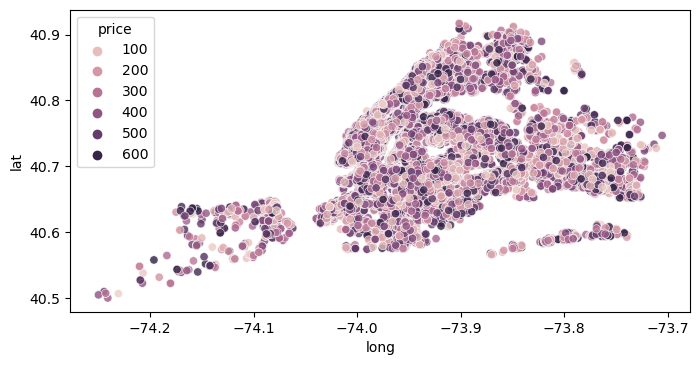

In [168]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=data_price,y='lat',x='long',hue='price',alpha=0.8)

#### Most of the hotels in Staten Island Lie below the median price of New York

In [220]:
test=df[['neighbourhood group','room type','price']]
test_1=df[['neighbourhood group','price']]

Average ==> price required neighbourhood group
  neighbourhood group       price
0               Bronx  632.215663
1            Brooklyn  626.875616
2           Manhattan  624.067075
3              Queens  628.487711
4       Staten Island  623.693512
--------------------------------------------------------------


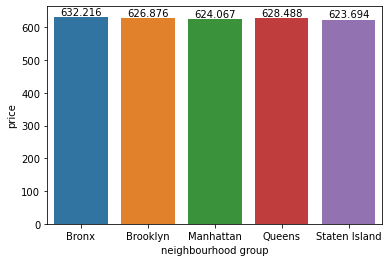

In [144]:
#Average price required neighbourhood group
graph=test_1.groupby(['neighbourhood group']).mean().reset_index()

chart = sns.barplot(graph['neighbourhood group'],graph['price'])
print('Average ==> price required neighbourhood group')
chart.bar_label(chart.containers[0])
print(graph)
print('--------------------------------------------------------------')



### Insight: The average price of a room in New York city is $625 with Bronx having the highest average price. Staten Island is the most affordable place to book Airbnbs 


In [221]:
# Percent of Airbnbs >1000 or <100
test=df[['neighbourhood group','room type','price']]
test_1=df[['neighbourhood group']]

In [170]:
houses = test_1.value_counts().reset_index()
houses

,neighbourhood group,0
0,Manhattan,39881
1,Brooklyn,38574
2,Queens,12450
3,Bronx,2541
4,Staten Island,894


In [171]:
houseslessthan100 = test[test['price']<100]
housesgreaterthan1000= test[test['price']>1000]
houseslessthan100=houseslessthan100[['neighbourhood group']]
housesgreaterthan1000=housesgreaterthan1000[['neighbourhood group']]

In [172]:
housesgreaterthan1000 = housesgreaterthan1000.value_counts().reset_index()
houseslessthan100=houseslessthan100.value_counts().reset_index()

In [173]:
houseslessthan100=houseslessthan100.merge(houses, on='neighbourhood group', how = 'left').reset_index()
housesgreaterthan1000 = housesgreaterthan1000.merge(houses, on='neighbourhood group', how = 'left').reset_index()

[Text(0, 0, '4.81'),
 Text(0, 0, '4.32'),
 Text(0, 0, '4.28'),
 Text(0, 0, '3.98'),
 Text(0, 0, '3.19')]

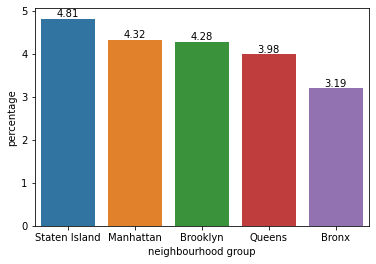

In [175]:
chart =sns.barplot(houseslessthan100['neighbourhood group'],houseslessthan100['percentage'])
chart.bar_label(chart.containers[0])

[Text(0, 0, '16.44'),
 Text(0, 0, '17.23'),
 Text(0, 0, '17.47'),
 Text(0, 0, '18.14'),
 Text(0, 0, '16.92')]

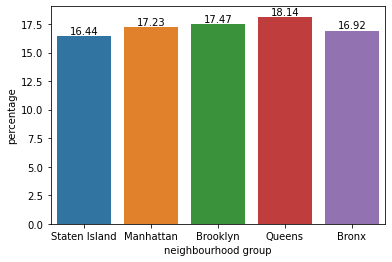

In [176]:
chart =sns.barplot(houseslessthan100['neighbourhood group'],housesgreaterthan1000['percentage'])
chart.bar_label(chart.containers[0])

### Insight: Bronx had the highest average price, whereas Staten Island has the most affordable Airbnbs

### Room type and price

In [181]:
# Checking the descriptive statistics of each Room Type
testgr=df.groupby('room type')['price'].describe()
testgr

,count,mean,std,min,25%,50%,75%,max
room type,,,,,,,,
Entire home/apt,49100.0,626.245947,331.704949,50.0,341.0,626.0,915.0,1200.0
Hotel room,111.0,663.387387,314.065082,50.0,405.0,634.0,937.5,1193.0
Private room,43068.0,625.471371,331.278092,50.0,341.0,623.0,911.0,1200.0
Shared room,2061.0,629.849588,337.917777,50.0,320.0,648.0,920.0,1199.0


Average ==> price per room type
         room type       price
0  Entire home/apt  626.245947
1       Hotel room  663.387387
2     Private room  625.471371
3      Shared room  629.849588
--------------------------------------------------------------


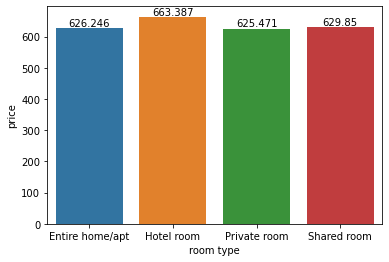

In [182]:
#Average price required neighbourhood group
graph=test.groupby(['room type']).mean().reset_index()

chart = sns.barplot(graph['room type'],graph['price'])
print('Average ==> price per room type')
chart.bar_label(chart.containers[0])
print(graph)
print('--------------------------------------------------------------')

### Insight: Hotel Rooms have the highest average price

### 2. Number of review rating

#### Neighborhood group and review rating

In [183]:
test=df[['neighbourhood group','neighbourhood','room type','number of reviews']]
test_1=df[['neighbourhood group','number of reviews']]
test_2=df[['neighbourhood group','neighbourhood','number of reviews']]

Maximum ==> number of reviews required neighbourhood group
  neighbourhood group    neighbourhood    room type  number of reviews
0               Bronx         Woodlawn  Shared room                450
1            Brooklyn  Windsor Terrace  Shared room                679
2           Manhattan     West Village  Shared room               1024
3              Queens         Woodside  Shared room                698
4       Staten Island          Woodrow  Shared room                387
--------------------------------------------------------------
Average ==> number of reviews required neighbourhood group
  neighbourhood group  number of reviews
0               Bronx          31.263676
1            Brooklyn          28.354125
2           Manhattan          23.849552
3              Queens          33.798153
4       Staten Island          34.711409
--------------------------------------------------------------
Minimum ==> number of reviews required neighbourhood group
  neighbourhood group    

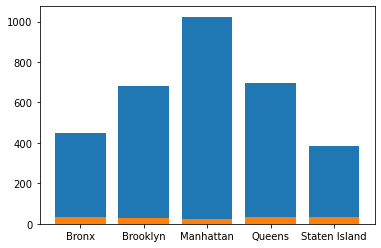

In [184]:
#Maximum number of reviews required neighbourhood group

graph=test.groupby(['neighbourhood group']).max().reset_index()

plt.bar(graph['neighbourhood group'],graph['number of reviews'])
print('Maximum ==> number of reviews required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Average number of reviews required neighbourhood group

graph=test.groupby(['neighbourhood group']).mean().reset_index()

plt.bar(graph['neighbourhood group'],graph['number of reviews'])
print('Average ==> number of reviews required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Minimum number of reviews required neighbourhood group

graph=test.groupby(['neighbourhood group']).min().reset_index()

plt.bar(graph['neighbourhood group'],graph['number of reviews'])
print('Minimum ==> number of reviews required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')


### Insight: Manhattan has the highest number of reviews. Although Brooklyn has the second highest number of Airbnbs, its average number of reviews received is equal to that of Queens which has much lower number of Airbnbs

#### Room Type and  Number of Reviews 

In [230]:
test=df[['room type','number of reviews']]

Maximum ==> number of reviews per room type
         room type  number of reviews
0  Entire home/apt               1024
1       Hotel room               1010
2     Private room                966
3      Shared room                480
--------------------------------------------------------------
Average ==> number of reviews per room type
         room type  number of reviews
0  Entire home/apt          27.228941
1       Hotel room          80.819820
2     Private room          27.571515
3      Shared room          20.754003
--------------------------------------------------------------
Minimum ==> number of reviews per room type
         room type  number of reviews
0  Entire home/apt                  0
1       Hotel room                  1
2     Private room                  0
3      Shared room                  0
--------------------------------------------------------------


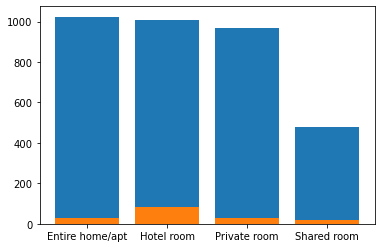

In [231]:
#Maximum number of reviews per room type

graph=test.groupby(['room type']).max().reset_index()

plt.bar(graph['room type'],graph['number of reviews'])
print('Maximum ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')
#Average number of reviews per room type

graph=test.groupby(['room type']).mean().reset_index()

plt.bar(graph['room type'],graph['number of reviews'])
print('Average ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')
#Minimum number of reviews per room type

graph=test.groupby(['room type']).min().reset_index()

plt.bar(graph['room type'],graph['number of reviews'])
print('Minimum ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')


Average ==> number of reviews per room type
         room type  number of reviews
0  Entire home/apt          27.228941
1       Hotel room          80.819820
2     Private room          27.571515
3      Shared room          20.754003
--------------------------------------------------------------


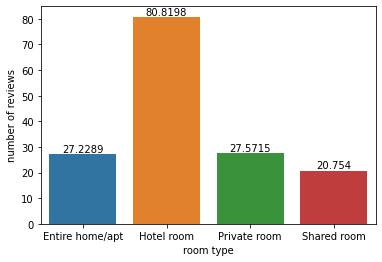

In [232]:
#Average number of reviews per room type
graph=test.groupby(['room type']).mean().reset_index()

chart = sns.barplot(graph['room type'],graph['number of reviews'])
chart.bar_label(chart.containers[0])
print('Average ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')


### Insight: Average number of reviews received has been higher for Hotel rooms compared to others

### 3. Review Rating 

#### Neighborhood group and review rating

In [225]:
test=df[['neighbourhood group','neighbourhood','room type','review rate number']]
test_1=df[['neighbourhood group','review rate number']]

Maximum ==> review rate number required neighbourhood group
  neighbourhood group  review rate number
0               Bronx                   5
1            Brooklyn                   5
2           Manhattan                   5
3              Queens                   5
4       Staten Island                   5
--------------------------------------------------------------
Average ==> review rate number required neighbourhood group
  neighbourhood group  review rate number
0               Bronx            3.350256
1            Brooklyn            3.268549
2           Manhattan            3.286853
3              Queens            3.333976
4       Staten Island            3.391499
--------------------------------------------------------------
Minimum ==> review rate number required neighbourhood group
  neighbourhood group  review rate number
0               Bronx                   1
1            Brooklyn                   1
2           Manhattan                   1
3              Queens 

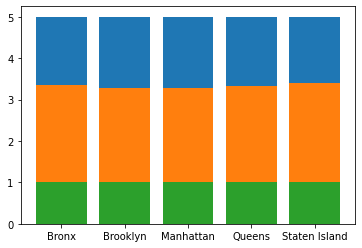

In [226]:
#Maximum review rate number required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).max().reset_index()

plt.bar(graph['neighbourhood group'],graph['review rate number'])
print('Maximum ==> review rate number required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Average review rate number required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).mean().reset_index()

plt.bar(graph['neighbourhood group'],graph['review rate number'])
print('Average ==> review rate number required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Minimum review rate number required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).min().reset_index()

plt.bar(graph['neighbourhood group'],graph['review rate number'])
print('Minimum ==> review rate number required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')


Average ==> review rating per neighbourhood group
  neighbourhood group  review rate number
0               Bronx            3.350256
1            Brooklyn            3.268549
2           Manhattan            3.286853
3              Queens            3.333976
4       Staten Island            3.391499
--------------------------------------------------------------


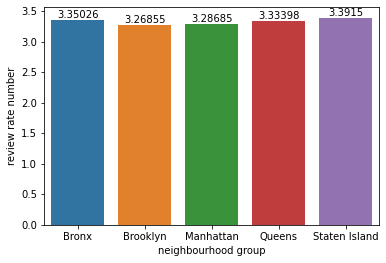

In [228]:
#Average rating across neighbourhood group
graph=test_1.groupby(['neighbourhood group']).mean().reset_index()

chart = sns.barplot(graph['neighbourhood group'],graph['review rate number'])
chart.bar_label(chart.containers[0])
print('Average ==> review rating per neighbourhood group')
print(graph)
print('--------------------------------------------------------------')

### Insight: On an average, Staten Island has the highest review rating amongst all others closely followed by Bronx.

#### Room type and number of reviews

In [233]:
test=df[['room type','review rate number']]

Maximum ==> number of reviews per room type
         room type  review rate number
0  Entire home/apt                   5
1       Hotel room                   5
2     Private room                   5
3      Shared room                   5
--------------------------------------------------------------
Average ==> number of reviews per room type
         room type  review rate number
0  Entire home/apt            3.285112
1       Hotel room            3.549550
2     Private room            3.289890
3      Shared room            3.316351
--------------------------------------------------------------
Minimum ==> number of reviews per room type
         room type  review rate number
0  Entire home/apt                   1
1       Hotel room                   2
2     Private room                   1
3      Shared room                   1
--------------------------------------------------------------


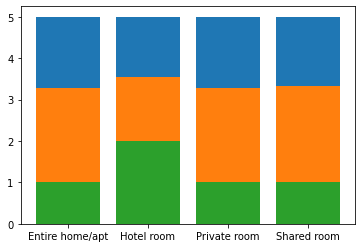

In [235]:
#Maximum number of reviews per room type

graph=test.groupby(['room type']).max().reset_index()

plt.bar(graph['room type'],graph['review rate number'])
print('Maximum ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')
#Average number of reviews per room type

graph=test.groupby(['room type']).mean().reset_index()

plt.bar(graph['room type'],graph['review rate number'])
print('Average ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')
#Minimum number of reviews per room type

graph=test.groupby(['room type']).min().reset_index()

plt.bar(graph['room type'],graph['review rate number'])
print('Minimum ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')


Average ==> number of reviews per room type
         room type  review rate number
0  Entire home/apt            3.285112
1       Hotel room            3.549550
2     Private room            3.289890
3      Shared room            3.316351
--------------------------------------------------------------


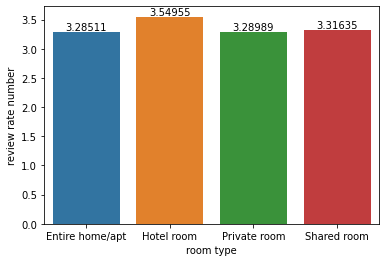

In [236]:
#Average number of reviews required room type
graph=test.groupby(['room type']).mean().reset_index()

chart = sns.barplot(graph['room type'],graph['review rate number'])
chart.bar_label(chart.containers[0])
print('Average ==> number of reviews per room type')
print(graph)
print('--------------------------------------------------------------')


### Average review rating is the highest for hotel rooms - since their hospitality might have played a key role in user ratings by the customers.

### 3. Minimum Nights 

<AxesSubplot:xlabel='long', ylabel='lat'>

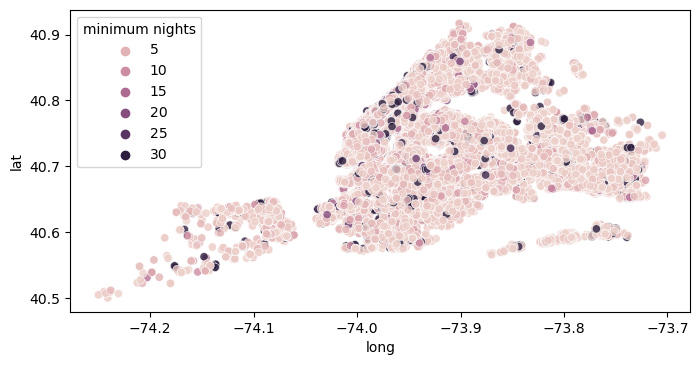

In [81]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,y='lat',x='long',hue='minimum nights',alpha=0.8)

### Insight: Most of the Airbnbs which offers a minimum night stay for more than 30 days are around Manhattan and then Queens

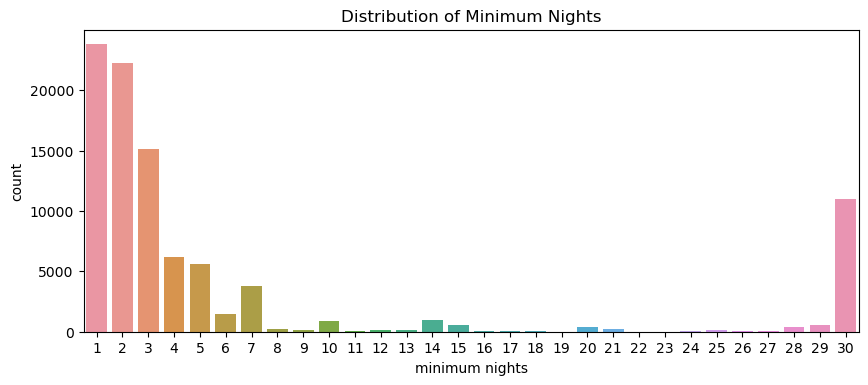

In [82]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='minimum nights')
plt.title('Distribution of Minimum Nights');

### Insight: Most of the customers have preferred booking Airbnbs which have a minimum booking restriction of upto 5 nights, the next preferred booking type has been for a minimum booking restriction of 1 month

In [199]:
minimum_nights = pd.DataFrame(df[['minimum nights']].value_counts()).reset_index()

In [200]:
minimum_nights.head()

,minimum nights,0
0,1,23809
1,2,22281
2,3,15096
3,30,11021
4,4,6221


#### Minimum nights and neighbourhood group

In [202]:
test=df[['neighbourhood group','neighbourhood','room type','minimum nights']]
test_1=df[['neighbourhood group','minimum nights']]

Maximum ==> minimum nights required neighbourhood group
  neighbourhood group  minimum nights
0               Bronx              30
1            Brooklyn              30
2           Manhattan              30
3              Queens              30
4       Staten Island              30
--------------------------------------------------------------
Average ==> minimum nights required neighbourhood group
  neighbourhood group  minimum nights
0               Bronx        4.268792
1            Brooklyn        5.755094
2           Manhattan        7.842256
3              Queens        5.566827
4       Staten Island        4.486577
--------------------------------------------------------------
Minimum ==> minimum nights required neighbourhood group
  neighbourhood group  minimum nights
0               Bronx               1
1            Brooklyn               1
2           Manhattan               1
3              Queens               1
4       Staten Island               1
----------------------

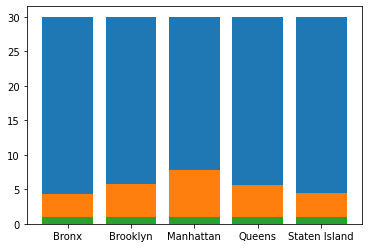

In [203]:
#Maximum minimum nights required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).max().reset_index()

plt.bar(graph['neighbourhood group'],graph['minimum nights'])
print('Maximum ==> minimum nights required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Average minimum nights required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).mean().reset_index()

plt.bar(graph['neighbourhood group'],graph['minimum nights'])
print('Average ==> minimum nights required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')
#Minimum minimum nights required neighbourhood group

graph=test_1.groupby(['neighbourhood group']).min().reset_index()

plt.bar(graph['neighbourhood group'],graph['minimum nights'])
print('Minimum ==> minimum nights required neighbourhood group')
print(graph)
print('--------------------------------------------------------------')

Average ==> price required neighbourhood group
  neighbourhood group  minimum nights
0               Bronx        4.268792
1            Brooklyn        5.755094
2           Manhattan        7.842256
3              Queens        5.566827
4       Staten Island        4.486577
--------------------------------------------------------------


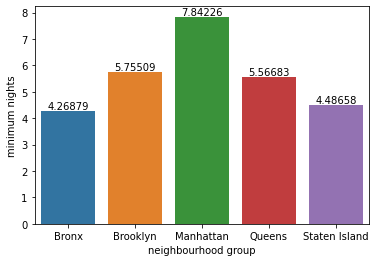

In [204]:
#Average min nights per neighbourhood group
graph=test_1.groupby(['neighbourhood group']).mean().reset_index()

chart = sns.barplot(graph['neighbourhood group'],graph['minimum nights'])
print('Average ==> price required neighbourhood group')
chart.bar_label(chart.containers[0])
print(graph)
print('--------------------------------------------------------------')


#### Minimum nights and room type

Average ==> min night per room type
         room type  minimum nights
0  Entire home/apt              30
1       Hotel room              30
2     Private room              30
3      Shared room              30
--------------------------------------------------------------
Average ==> min night per room type
         room type  minimum nights
0  Entire home/apt        7.862138
1       Hotel room        4.198198
2     Private room        5.141683
3      Shared room        5.327511
--------------------------------------------------------------
Average ==> min night per room type
         room type  minimum nights
0  Entire home/apt               1
1       Hotel room               1
2     Private room               1
3      Shared room               1
--------------------------------------------------------------


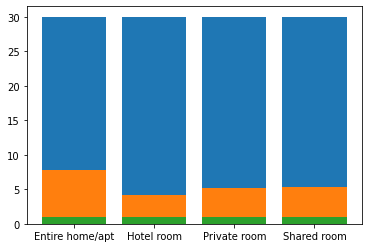

In [237]:
test=df[['room type','minimum nights']]

#Average number of reviews per room type

graph=test.groupby(['room type']).max().reset_index()

plt.bar(graph['room type'],graph['minimum nights'])
print('Average ==> min night per room type')
print(graph)
print('--------------------------------------------------------------')
#Average number of reviews per room type

graph=test.groupby(['room type']).mean().reset_index()

plt.bar(graph['room type'],graph['minimum nights'])
print('Average ==> min night per room type')
print(graph)
print('--------------------------------------------------------------')
#Average number of reviews per room type

graph=test.groupby(['room type']).min().reset_index()

plt.bar(graph['room type'],graph['minimum nights'])
print('Average ==> min night per room type')
print(graph)
print('--------------------------------------------------------------')

Average ==> min night per room type
         room type  minimum nights
0  Entire home/apt        7.862138
1       Hotel room        4.198198
2     Private room        5.141683
3      Shared room        5.327511
--------------------------------------------------------------


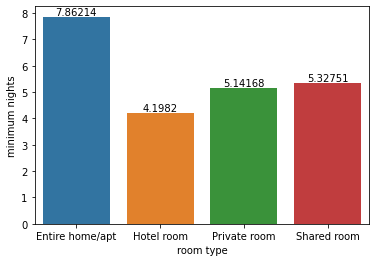

In [206]:
#Average min nights per room type
graph=test.groupby(['room type']).mean().reset_index()

chart = sns.barplot(graph['room type'],graph['minimum nights'])
chart.bar_label(chart.containers[0])
print('Average ==> min night per room type')
print(graph)
print('--------------------------------------------------------------')

### Insight: Entire home/apt are booked for the longest number of minimum nights compared to other room types

### 4. Instant Booking 

<AxesSubplot:xlabel='long', ylabel='lat'>

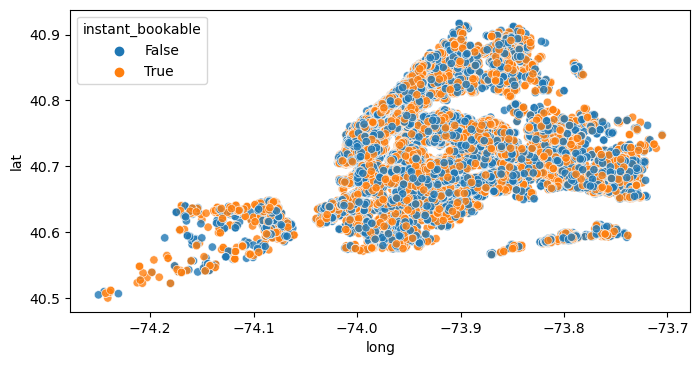

In [207]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,y='lat',x='long',hue='instant_bookable',alpha=0.8)

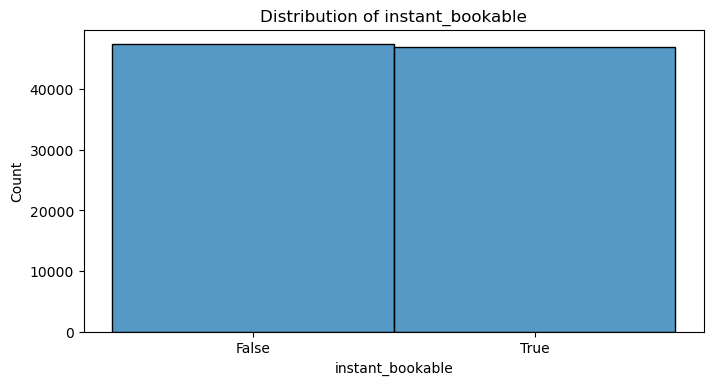

In [208]:
df['instant_bookable']=df['instant_bookable'].astype(str)
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(data=df,x='instant_bookable')
plt.title('Distribution of instant_bookable');

In [211]:
test=df[['neighbourhood group','room type','instant_bookable']]
test_1=df[['neighbourhood group','instant_bookable']]


#### Instant Bookable houses and Neighbourhood group

In [212]:
graph=test_1.groupby(['neighbourhood group','instant_bookable']).count().reset_index()
graph = test_1.value_counts()
print(graph)
print('--------------------------------------------------------------')

neighbourhood group  instant_bookable
Manhattan            False               20052
                     True                19829
Brooklyn             False               19398
                     True                19176
Queens               False                6301
                     True                 6149
Bronx                True                 1274
                     False                1267
Staten Island        True                  464
                     False                 430
dtype: int64
--------------------------------------------------------------


#### Instant Bookable houses, and Neighbourhood Group and Room Type 

In [213]:
graph = test.value_counts()
print(graph)
print('--------------------------------------------------------------')


neighbourhood group  room type        instant_bookable
Manhattan            Entire home/apt  False               11989
                                      True                11964
Brooklyn             Private room     False                9510
                     Entire home/apt  False                9508
                                      True                 9414
                     Private room     True                 9361
Manhattan            Private room     False                7621
                                      True                 7383
Queens               Private room     False                3653
                                      True                 3618
                     Entire home/apt  False                2480
                                      True                 2353
Bronx                Private room     False                 749
                                      True                  742
                     Entire home/apt  True       

## Multivariate Analysis for further analysis 

#### Average Rating vs instant bookable

In [96]:
test=df[['review rate number','instant_bookable']]
graph = test.groupby(['instant_bookable']).mean()
graph


,review rate number
instant_bookable,
False,3.283026
True,3.293611


### Insight: Customer review ratings has been higher for if listing has instant booking policy

#### Average Rating vs Cancellation Policy

In [215]:
test=df[['review rate number','cancellation_policy']]
graph = test.groupby(['cancellation_policy']).mean()
graph


,review rate number
cancellation_policy,
flexible,3.288156
moderate,3.289752
strict,3.286947


### Insight: Average customer review ratings is more or less the same for different cancellation policies making it a less impactful factor

#### Price Vs Cancellation

In [216]:
test=df[['price','cancellation_policy']]
graph = test.groupby(['cancellation_policy']).mean()
graph


,price
cancellation_policy,
flexible,627.588076
moderate,625.403574
strict,625.057994


### Insight: Understandably prices are higher for listings with flexible cancellation policies

#### Recommendation of roomtype for each neighbourhood group based on minimum nights

In [99]:
test=df[['neighbourhood group','room type','price','minimum nights']]
less_5=test[test['minimum nights']<6]
less_5['Bucket']="less than 5"
between_month =test[test['minimum nights'].between(6,29)]
between_month['Bucket']="6 - 29"
greater_30=test[test['minimum nights']>29]
greater_30['Bucket']="more than a month"
test = pd.concat([less_5, between_month,greater_30])
a=test.groupby(['neighbourhood group','Bucket','room type']).agg({'price':['count','mean']}).reset_index()
a.sort_values([('neighbourhood group',''),('Bucket',''),('price',  'mean')])

neighbourhood group             Bucket        room type  price            
                                                            count        mean
0                Bronx             6 - 29  Entire home/apt     71  559.676056
1                Bronx             6 - 29     Private room     84  635.785714
2                Bronx             6 - 29      Shared room      7  683.571429
5                Bronx        less than 5      Shared room    100  578.890000
3                Bronx        less than 5  Entire home/apt    818  633.436430
4                Bronx        less than 5     Private room   1318  635.021244
7                Bronx  more than a month     Private room     89  649.191011
6                Bronx  more than a month  Entire home/apt     54  699.185185
10            Brooklyn             6 - 29      Shared room     60  542.983333
9             Brooklyn             6 - 29     Private room   2187  621.252858
8             Brooklyn             6 - 29  Entire home/apt   2206  631.370354
13            Brooklyn        less than 5     Private room  15346  625.682653
11            Brooklyn        less than 5  Entire home/apt  14890  628.038684
14            Brooklyn        less than 5      Shared room    569  633.896309
12            Brooklyn        less than 5       Hotel room      5  662.000000
15            Brooklyn  more than a month  Entire home/apt   1826  619.886090
17            Brooklyn  more than a month     Private room   1338  637.435725
18            Brooklyn  more than a month      Shared room    145  643.765517
16            Brooklyn  more than a month       Hotel room      2  836.000000
21           Manhattan             6 - 29      Shared room     72  494.930556
20           Manhattan             6 - 29     Private room   1589  608.455632
19           Manhattan             6 - 29  Entire home/apt   2958  640.674104
22           Manhattan        less than 5  Entire home/apt  15780  623.010330
24           Manhattan        less than 5     Private room  12422  625.498148
25           Manhattan        less than 5      Shared room    719  646.489569
23           Manhattan        less than 5       Hotel room     86  646.767442
28           Manhattan  more than a month     Private room    993  599.231621
26           Manhattan  more than a month  Entire home/apt   5215  621.602109
29           Manhattan  more than a month      Shared room     37  623.972973
27           Manhattan  more than a month       Hotel room     10  956.600000
32              Queens             6 - 29      Shared room      8  356.000000
31              Queens             6 - 29     Private room    572  600.073427
30              Queens             6 - 29  Entire home/apt    412  632.019417
34              Queens        less than 5       Hotel room      8  433.250000
33              Queens        less than 5  Entire home/apt   3987  623.158515
35              Queens        less than 5     Private room   5910  632.243486
36              Queens        less than 5      Shared room    299  632.451505
37              Queens  more than a month  Entire home/apt    434  631.299539
38              Queens  more than a month     Private room    789  642.773131
39              Queens  more than a month      Shared room     31  754.741935
41       Staten Island             6 - 29     Private room     20  614.900000
40       Staten Island             6 - 29  Entire home/apt     24  886.333333
43       Staten Island        less than 5     Private room    383  596.587467
42       Staten Island        less than 5  Entire home/apt    395  632.569620
44       Staten Island        less than 5      Shared room     14  709.857143
46       Staten Island  more than a month     Private room     28  600.464286
45       Staten Island  more than a month  Entire home/apt     30  630.100000

#### Listings per neighbourhood

In [100]:
test=df[['neighbourhood group','neighbourhood','review rate number']]
test=test.groupby(['neighbourhood group']).agg({'review rate number':['count','mean'],'neighbourhood':['nunique']})
test['Listing per neighbourhood']=test[( 'review rate number',   'count')]/test[(      'neighbourhood', 'nunique')]
test.drop(( 'review rate number',   'count'), axis=1, inplace=True)
test.columns = test.columns.map('_'.join).str.strip('_')
test

,review rate number_mean,neighbourhood_nunique,Listing per neighbourhood
neighbourhood group,,,
Bronx,3.350256,48,52.937500
Brooklyn,3.268549,48,803.625000
Manhattan,3.286853,32,1246.281250
Queens,3.333976,52,239.423077
Staten Island,3.391499,44,20.318182


### Insight: Listings per neighborhood is the least for Bronx and Staten Island with a better average review than established neighborhoods

# Overall Insights:
## 1. Bronx & Staten Island should be the focus group for expansion to avoid cannibalization in established neighborhood groups
## 2. Having entire home/apt & private room as primary focus, hotel rooms also should be considered owing to their better average # of reviews and ratings
## 3. On average an Airbnb in New York costs ~627 with Staten Island providing the most affordable ones
## 4. Volume of booking has been high for Airbnb listings with minimum night restrictions upto 5 nights
## 5. Instant booking policy has been an impactful factor in customer reviews, whereas flexible cancellation policy has had minimal impact